In [1]:
import pickle
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [3]:
df=pd.read_pickle('BBresults.pkl')
split_df = pd.DataFrame(df['coordinates'].tolist(), columns=['loc_lat', 'loc_lon'])
df = pd.concat([df, split_df], axis=1)
df=df[df['eventname']=='2021011100']
df=df[df['channel']=='EHZ']


In [4]:
df1=pd.read_pickle('NormMeanErgs.pkl')
df1=df1.rename(columns={'Station Name':'station', 'RS Median Tacer Energy':'RsMedTacErgs'}) 
df1=df1[df1['eventname']=='2021011100']
#df2=pd.concat([df,df1], axis=1)
df2=pd.merge(df,df1, on='station')
df2=df2[df2['Normalization']<=10]
norms=df2['Normalization'].tolist()
norms

[-6.080216863492953,
 -6.080216863492953,
 -8.063494461916662,
 -8.063494461916662,
 -6.302557659625437,
 -6.302557659625437,
 -7.3711798250560925,
 -7.3711798250560925,
 -7.549176959150934,
 -7.549176959150934,
 -6.904848380205173,
 -6.904848380205173,
 -9.137663923628635,
 -9.137663923628635,
 -5.741536062481506,
 -5.741536062481506,
 -8.126326139181964,
 -8.126326139181964,
 -9.315051374699337,
 -9.315051374699337,
 -7.157029591191719,
 -7.157029591191719,
 -6.913878212885617,
 -6.913878212885617,
 -6.624469877753456,
 -6.624469877753456,
 -2.7847332940785368,
 -2.7847332940785368,
 -9.244247906356799,
 -9.244247906356799,
 -7.020803031130786,
 -7.020803031130786,
 -7.070572287781395,
 -7.070572287781395,
 -7.888408463677664,
 -7.888408463677664,
 -6.261052017556526,
 -6.261052017556526,
 -7.324904367356187,
 -7.324904367356187,
 -7.441697317737573,
 -7.441697317737573,
 -6.833722895237051,
 -6.833722895237051,
 -7.723318474401965,
 -7.723318474401965,
 -7.443820390692672,
 -7.44382

In [57]:
event=pd.read_pickle('Combined_Results.pkl')
event=event[event['eventname']=='2021011100']
event

,eventname,iteration,etime,elat,elon,edepth,focmech,network,chan,stationrange,nstats,fbands,pwindow,eventdir,modtime,cutoff,tacer,t25,t75,ebbmedtacmean,STD10(medtac),Me(medtac),ehfmedtacmean,STD10(hfmedtac),ebbcorrmedtacmean,STD10(corr),Me(corr),ehfcorrmedtacmean,STD10(hfcorr),ebbpertacmean,STD10(per),Me(per),ehfpertacmean,STD10(hfper),ebbcorrpertacmean,STD10(percorr),Me(corrper),ehfcorrpertacmean,STD10(hfpercorr),Droptimes,Mom,Mw,CMTNAME
45,2021011100,00,2021-01-11T21:32:59.000000Z,51.32,100.39,13.9,"[355, 43, -143]",AM,EHZ,"[0.0, 80.0]",239,"[[0.00333333, 2.0], [0.5, 2.0]]","[-60, 300]",/home/ljaffe7/Rtergpy/rterg_events/events/2021...,2022-07-14T15:33:23.063869Z,15.0,20.0,18.5,24.0,1062981629833044.0,0.394581,7.117684,14143372950687.851562,0.491066,3104691062578006.0,0.410542,7.428012,42582392015743.78125,0.443976,1107010417487869.625,0.397697,7.129434,16856505325094.650391,0.521267,3278537032269389.0,0.431264,7.443787,49176951015018.125,0.447381,"[22, 75, 273]",5.300000e+26,7.08,202007170250A


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, '2021011100 Event')

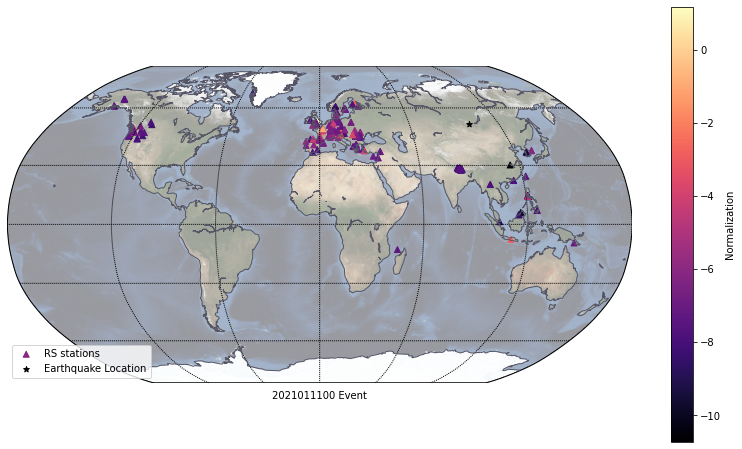

In [68]:
#map of events, doesn't include events with normalizations over 10
cm=plt.cm.get_cmap('magma')
plt.figure(figsize=(14,8))
earth=Basemap(projection='robin', lon_0=0)
earth.drawparallels(np.arange(-90., 120., 30.))
earth.drawmeridians(np.arange(0., 360.,60.))
earth.bluemarble(alpha=0.40)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y=earth(np.array(df2.loc_lon), np.array(df2.loc_lat))
a,b=earth(event.elon, event.elat)
norm=np.array(df2.Normalization)
sc =plt.scatter(x,y,c=norm,cmap=cm, alpha=1, label ='RS stations', marker="^")
sc1 =plt.scatter(a,b,cmap=cm, alpha=1, label ='Earthquake Location', color='#000000', marker="*")
plt.colorbar(sc,label='Normalization')
plt.clim(-10,10)
plt.legend(loc='lower left')
plt.xlabel("2021011100 Event")